In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Linear SVM Classification

import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
iris.keys()

X = iris["data"][:, (2, 3)]
y = (iris["target"] == 2).astype(np.float64)

svm_clf = Pipeline([
("scaler", StandardScaler()),
("linear_svc", LinearSVC(C=1, loss="hinge")),
])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [3]:
svm_clf.predict([[5.5, 2]])

# Instead of using the LinearSVC class, we could use the SVC class with a linear
# kernel. When creating the SVC model, we would write SVC(kernel="linear",
# C=1). Or we could use the SGDClassifier class, with
# SGDClassifier(loss="hinge", alpha=1/(m*C)).


# The LinearSVC class regularizes the bias term, so you should center the training set first by
# subtracting its mean. This is automatic if you scale the data using the StandardScaler. Also
# make sure you set the loss hyperparameter to "hinge", as it is not the default value. Finally,
# for better performance, you should set the dual hyperparameter to False, unless there are
# more features than training instances (we will discuss duality later in the chapter).

array([1.])

In [4]:
# Nonlinear SVM

from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15)

polynomial_clf = Pipeline([
    ('add_poly', PolynomialFeatures(degree=3)),
    ('scaller', StandardScaler()),
    ('linear_svm', LinearSVC(C=10, loss='hinge'))
])

polynomial_clf.fit(X,y)

/home/dmytro/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('add_poly', PolynomialFeatures(degree=3)),
                ('scaller', StandardScaler()),
                ('linear_svm', LinearSVC(C=10, loss='hinge'))])

In [5]:
# pt = (X[y==1], X[y==0])

# plt.scatter(pt[0][:,0],pt[0][:,1])
# plt.scatter(pt[1][:,0],pt[0][:,1], c='red')
# plt.scatter(1,0,c='green')
# polynomial_clf.predict([[1,0]])

In [7]:
# Polynomial Kernel
# Simple SVC uses kernel trick

from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y)
# This code trains an SVM classifier using a third-degree polynomial kernel.
# The hyperparameter coef0 controls how much the
# model is influenced by high-degree polynomials versus low-degree polynomials.



Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [8]:
# Gaussian RBF Kernel

# Once again the kernel trick does its SVM magic, making it possible to obtain a
# similar result as if you had added many similarity features. Let’s try the SVC
# class with the Gaussian RBF kernel:

rbf_kernel_svm_clf = Pipeline([
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

In [9]:
# SVM Regression

# Linear
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

# Kernel
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

# The SVR class is the regression equivalent of the SVC class, and the LinearSVR
# class is the regression equivalent of the LinearSVC class.




SVR(C=100, degree=2, kernel='poly')

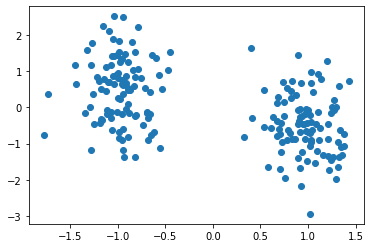

In [120]:
# task8
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

X, y = datasets.make_blobs(n_samples=200, centers=2, n_features=2, center_box=(0, 10))

scaler = StandardScaler()

X = scaler.fit_transform(X)

svm = SVC()
lsvm = LinearSVC()
sgd = SGDClassifier(loss='hinge', alpha=1/100)

svm.fit(X,y)
lsvm.fit(X,y)
sgd.fit(X,y)


# X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3,random_state=90)

# linear_pipe = Pipeline([
#     ('scaller', StandardScaler()),
#     ('linear_SVM', LinearSVC()),
# ])

# svm_pipe = Pipeline([
#     ('scaller', StandardScaler()),
#     ('SVM', SVC()),
# ])

# sgd_pipe = Pipeline([
#     ('scaller', StandardScaler()),
#     ('SGD', SGDClassifier(loss='hinge', alpha=1/100)),
# ])



# svm_pipe.fit(X_train, y_train)
# sgd_pipe.fit(X_train, y_train)
# linear_pipe.fit(X_train, y_train)


a,b = X[:,0],X[:,1]
plt.scatter(a,b)

In [122]:
# svm_pipe.score(X_test, y_test), sgd_pipe.score(X_test, y_test), linear_pipe.score(X_test, y_test)
